Import necessary packages for this analysis

In [1]:
import yfinance as yf
import pandas as pd
import pyfolio as pf
import warnings
warnings.filterwarnings("ignore")

Use yFinance to download historical stock data for the portfolio

In [ ]:
data = yf.download(
    ["AAPL", "GOOG", "CRM","NOW", "AXP", "META", "SNOW", "NFLX", "FSLR", "CVX", "VRTX", "PYPL",\
     "MSFT", "QCOM", "UNH", "AMGN", "SPY"],
    start="2024-01-01",
    end="2024-12-13"
)

returns = data["Adj Close"].pct_change().dropna()

display(returns)

In [ ]:
benchmark_rets = returns.pop("SPY")
print(benchmark_rets)

Generate a DataFrame of daily positions for the specified stocks with a net position per day equal to 100.

In [ ]:
import numpy as np
dates = pd.date_range(start="2024-01-01", end="2024-12-13", freq='B')
positions = pd.DataFrame(100, index=dates, columns=["AXP", "CSCO", "GOOG"])
positions["cash"] = 0
display(positions)

In [5]:
import pandas as pd
import yfinance as yf

# Set the start and end dates for the historical data
start_date = "2024-01-01"
end_date = "2024-12-31"

# Dictionary of stocks with their corresponding number of shares
stock_positions = {
    "AAPL": 100,
    "GOOG": 6000,
    "CRM": 200,
    "NOW": 300,
    "AXP": 150,
    "META": 500,
    "SNOW": 250,
    "NFLX": 400,
    "FSLR": 350,
    "CVX": 450,
    "VRTX": 550,
    "PYPL": 600,
    "MSFT": 700,
    "QCOM": 800,
    "UNH": 900,
    "AMGN": 1000,
    "SPY": 1100
}

# Generate a date range for the positions and localize to UTC
dates = pd.date_range(start=start_date, end=end_date, freq='B', tz='UTC')  # Business days

# Download historical data for the stocks
tickers = list(stock_positions.keys())
data = yf.download(tickers, start=start_date, end=end_date)

# Localize the data index to UTC
data.index = data.index.tz_convert('UTC')

# Reindex the data to match the date range and fill missing values
data = data.reindex(dates).fillna(method='ffill').fillna(method='bfill')

# Create an empty DataFrame with the date range as the index and stock symbols as columns
positions = pd.DataFrame(index=dates, columns=stock_positions.keys())

# Get the daily_close prices for each stock
daily_close = data['Adj Close']

# Populate the DataFrame with the net position values for each stock in the portfolio
for stock, shares in stock_positions.items():
    positions[stock] = shares * daily_close[stock]

# Add a 'cash' column with 0 values
positions['cash'] = 0


# Calculate daily portfolio returns as a percentage
portfolio_returns = positions.sum(axis=1).pct_change().dropna()

# Display the DataFrame
print(portfolio_returns)



[*********************100%***********************]  17 of 17 completed

2024-01-02 00:00:00+00:00    0.000000
2024-01-03 00:00:00+00:00   -0.001315
2024-01-04 00:00:00+00:00   -0.002657
2024-01-05 00:00:00+00:00   -0.001094
2024-01-08 00:00:00+00:00    0.016638
                               ...   
2024-12-25 00:00:00+00:00    0.000000
2024-12-26 00:00:00+00:00    0.000000
2024-12-27 00:00:00+00:00    0.000000
2024-12-30 00:00:00+00:00    0.000000
2024-12-31 00:00:00+00:00    0.000000
Freq: B, Length: 261, dtype: float64


In [7]:

returns = data["Adj Close"].pct_change().dropna()
benchmark_rets = returns.pop("SPY")
print(benchmark_rets)

2024-01-02 00:00:00+00:00    0.000000
2024-01-03 00:00:00+00:00   -0.008167
2024-01-04 00:00:00+00:00   -0.003221
2024-01-05 00:00:00+00:00    0.001370
2024-01-08 00:00:00+00:00    0.014276
                               ...   
2024-12-25 00:00:00+00:00    0.000000
2024-12-26 00:00:00+00:00    0.000000
2024-12-27 00:00:00+00:00    0.000000
2024-12-30 00:00:00+00:00    0.000000
2024-12-31 00:00:00+00:00    0.000000
Freq: B, Name: SPY, Length: 261, dtype: float64


Generate a detailed portfolio analysis with PyFolio

Start date,2024-01-02
End date,2024-12-31
Total months,12
,Backtest
Annual return,28.313%
Cumulative returns,29.461%
Annual volatility,13.994%
Sharpe ratio,1.85
Calmar ratio,3.51
Stability,0.91
Max drawdown,-8.062%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.06,2024-07-10,2024-08-07,2024-10-11,68
1,4.16,2024-02-09,2024-03-05,2024-03-20,29
2,3.82,2024-11-11,2024-11-15,2024-12-04,18
3,3.48,2024-04-01,2024-04-19,2024-05-03,25
4,3.35,2024-05-21,2024-05-30,2024-06-11,16


Stress Events,mean,min,max
Covid,0.11%,-3.22%,2.99%


Top 10 long positions of all time,max
GOOG,26.53%
SPY,15.05%
UNH,13.55%
AMGN,8.42%
NFLX,8.15%
MSFT,7.77%
NOW,7.38%
META,6.83%
VRTX,6.60%
QCOM,4.27%


Top 10 short positions of all time,max


Top 10 positions of all time,max
GOOG,26.53%
SPY,15.05%
UNH,13.55%
AMGN,8.42%
NFLX,8.15%
MSFT,7.77%
NOW,7.38%
META,6.83%
VRTX,6.60%
QCOM,4.27%


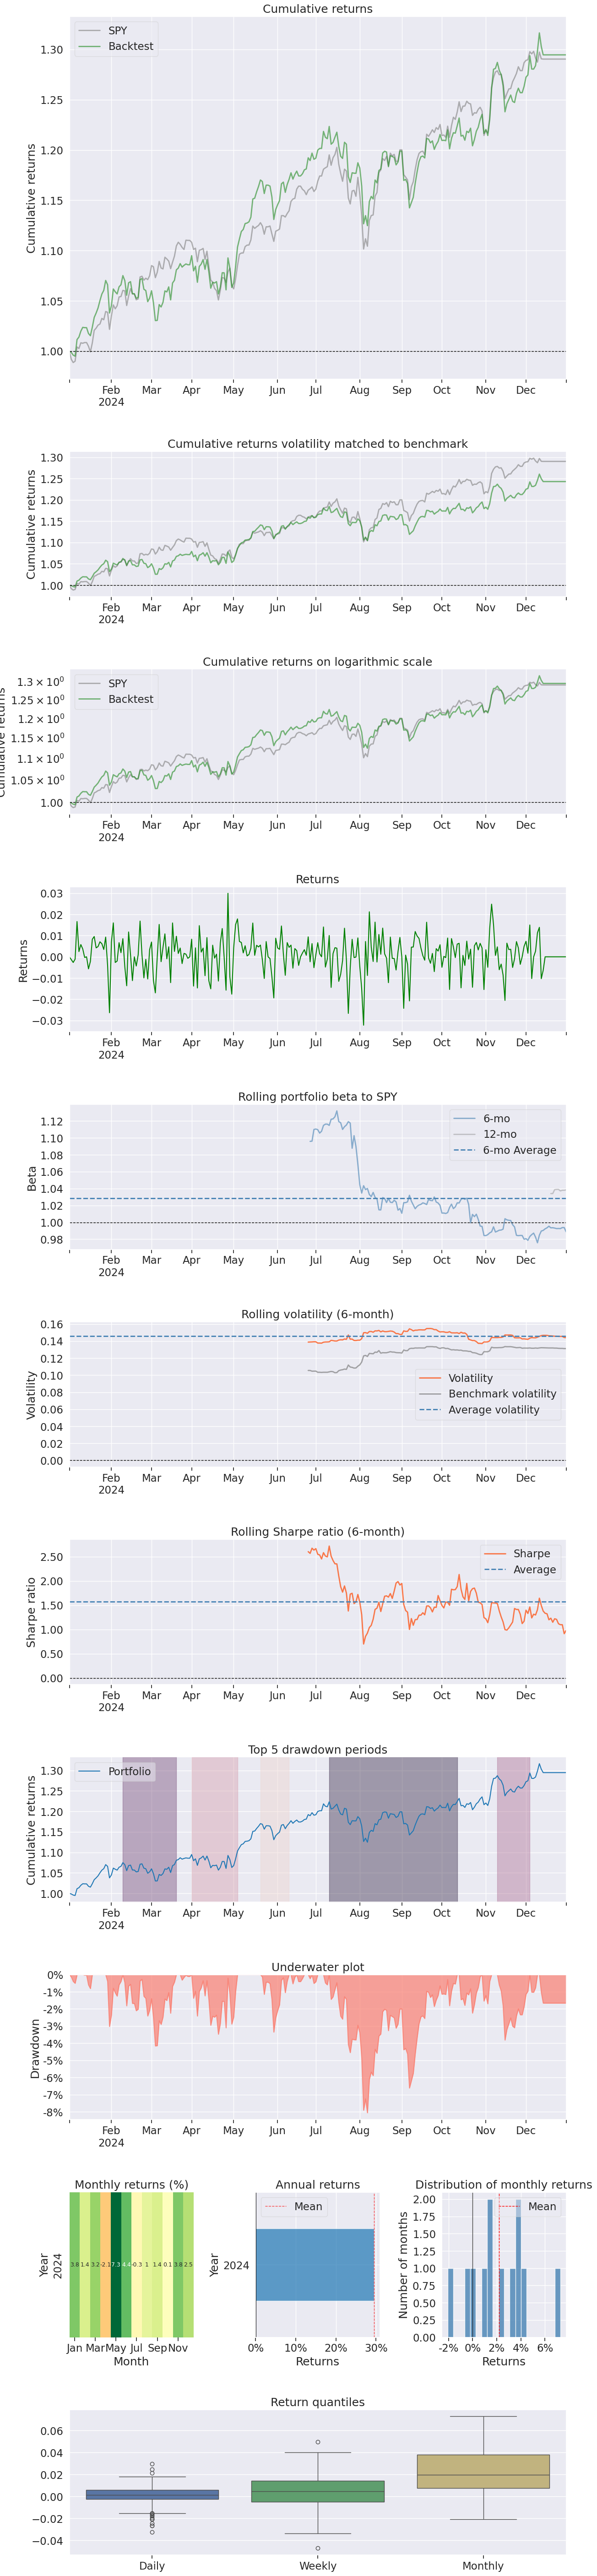

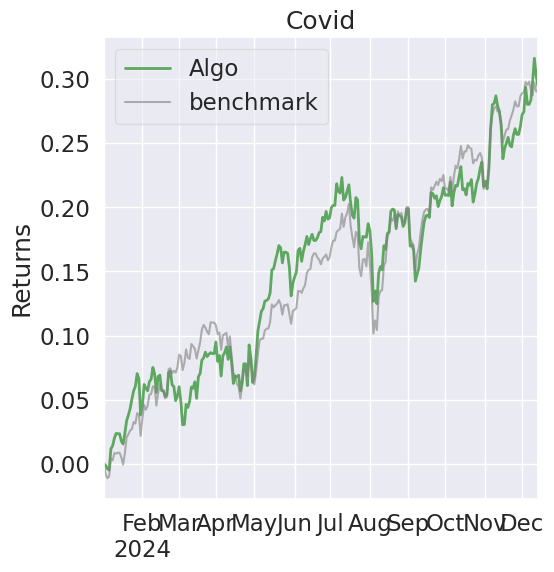

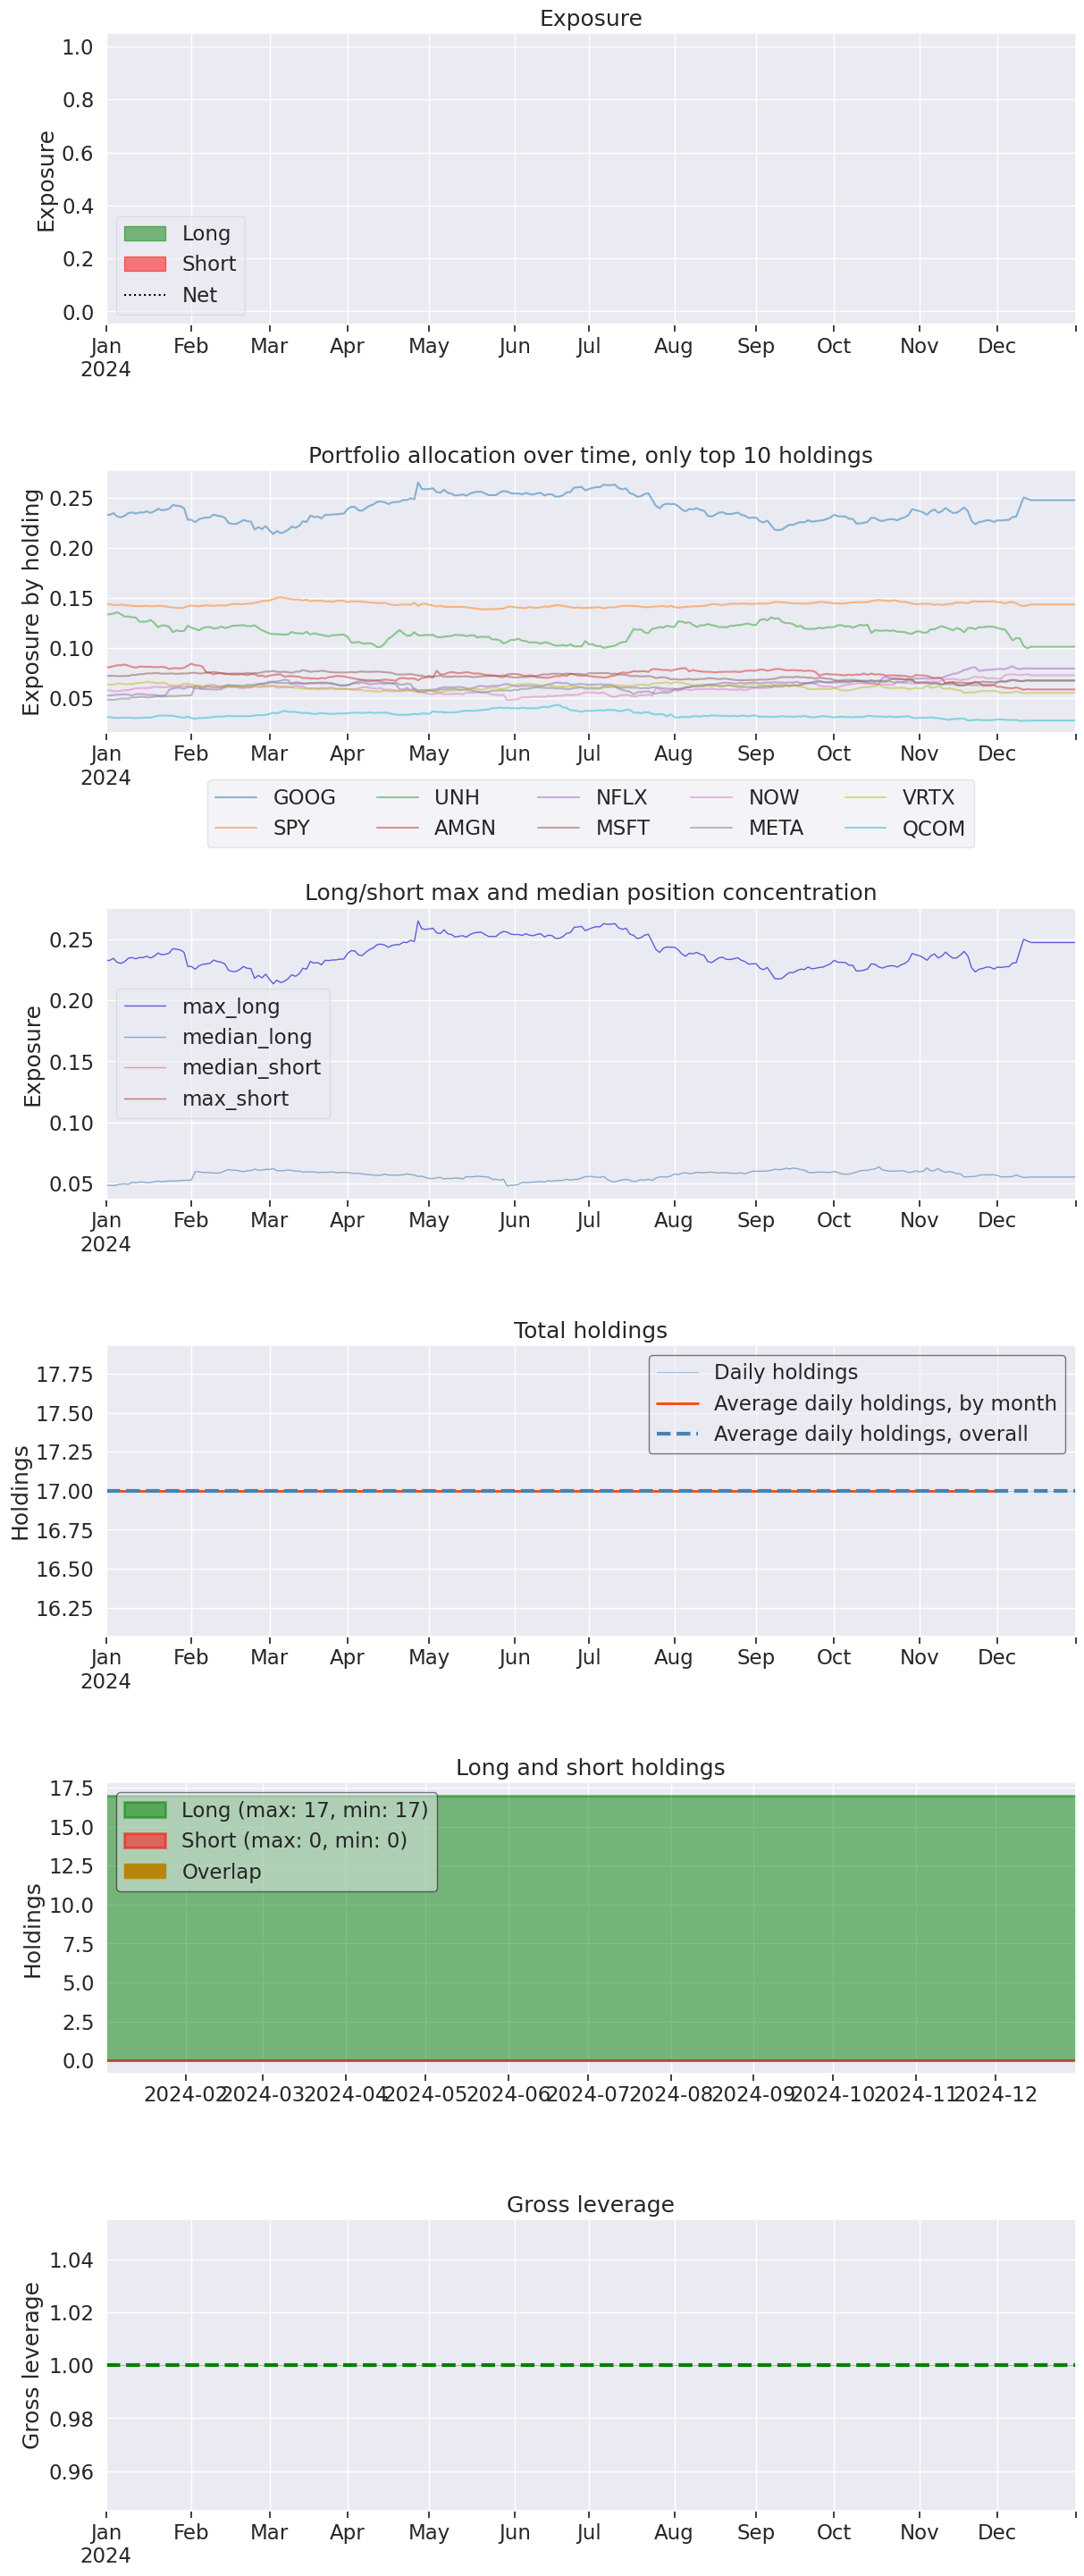

In [8]:
pf.create_full_tear_sheet(
    portfolio_returns,
    positions=positions,
    benchmark_rets=benchmark_rets
)